In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-selling-price-prediction-dataset/Car details.csv


# Car Prices Prediction of Used Cars

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cars = pd.read_csv("/kaggle/input/car-selling-price-prediction-dataset/Car details.csv")
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [4]:
cars.shape

(8128, 13)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
cars.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
cars = cars.dropna(how='any')
cars.shape

(7906, 13)

In [9]:
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [10]:
cars.isnull().sum().sum()

0

## Data Preprocessing

In [11]:
import re

Torque Feature - preprocessing

In [12]:
torque_list = cars['torque'].to_list()
# torque_list[:2]
torque_rpm = []
def extractingRPM(x):
    for item in x:
        res = item.replace(".", "")
        res = item.replace(",", "")
        temp = [int(s) for s in re.findall(r'\d+', res)]
        torque_rpm.append(max(temp))
        
extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [13]:
cars['torque_rpm'] = torque_rpm
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


mileage Feature - Preprocessing

In [14]:
mil_list = cars['mileage'].to_list()
mil_kmpl = []
def extractingmil(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        mil_kmpl.append(max(temp))
        
extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [15]:
cars['mil_kmpl'] = mil_kmpl
cars[:2]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14


engine Feature - Preprocessing

In [16]:
engine_list = cars['engine'].to_list()
engine_cc = []
def extractingEngine(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        engine_cc.append(max(temp))
        
extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [17]:
cars['engine_cc'] = engine_cc
cars[:2]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0


In [18]:
power_list = cars['max_power'].to_list()

max_power = []
def extractingPower(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        max_power.append(max(temp))
        
extractingPower(power_list)
print(power_list[:2])
print(max_power[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [19]:
cars['max_power_new'] = max_power
cars[:2]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52


In [20]:
cars_new = cars.drop(['mileage', 'engine', 'max_power', 'torque'],axis=1)

In [21]:
cars_new.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
seats            0
torque_rpm       0
mil_kmpl         0
engine_cc        0
max_power_new    0
dtype: int64

In [22]:
cars_new.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3069.864154,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,943.662100,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2400.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,21800.000000,42.000000,3604.000000,400.000000


The ranges for all the columns are all over teh place so we might have to normalize some columns or standardize the dataset

<AxesSubplot:>

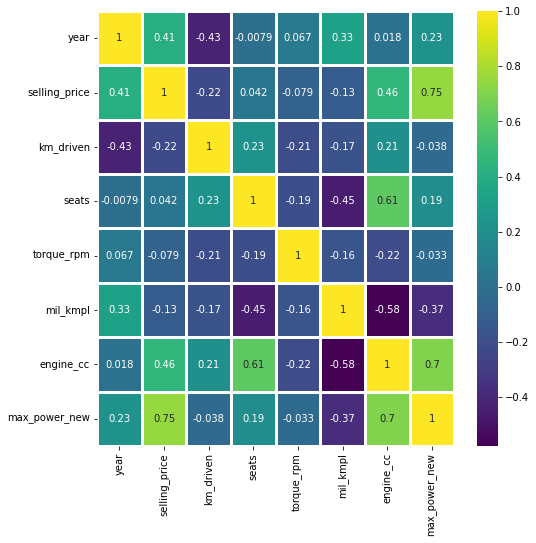

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(cars_new.corr(),annot=True,cmap='viridis', linewidths=3)

- We can see there is high correlation of selling price(which we will be predicting) with max_power output of the car
- the values of correlation are pretty averaged out meaning we wont be excluding any column as each column is able to provide us with new information that is not provided by any other column.

**Our journey for finding categorical data**

In [24]:
cars_new['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [25]:
cars_new['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [26]:
cars_new['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [27]:
cars_new['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

**Converting categorical data to integer format**

**Transmission Feature**

In [28]:
def ref1(x):
    if x == 'Manual':
        return 1
    else: 
        return 0
cars_new['transmission'] = cars_new['transmission'].map(ref1)

**Seller_type** Feature

In [29]:
def ref2(x):
    if x == 'Individual':
        return 1
    elif x=='Dealer':
        return 0
    else:
        return -1
    
cars_new['seller_type'] = cars_new['seller_type'].map(ref2)


**fuel Feature**

In [30]:
def ref3(x):
    if x == 'Petrol':
        return 1
    elif x == 'Diesel':
        return 0
    
cars_new['fuel'] = cars_new['fuel'].map(ref3)

In [31]:
cars_new[:5]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,0.0,1,1,First Owner,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0.0,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,1.0,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0.0,1,1,First Owner,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,1.0,1,1,First Owner,5.0,4500,16.10,1298.0,88.20


In [32]:
cars_new.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel             87
seller_type       0
transmission      0
owner             0
seats             0
torque_rpm        0
mil_kmpl          0
engine_cc         0
max_power_new     0
dtype: int64

In [33]:
cars_new = cars_new.dropna()
cars_new.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
seats            0
torque_rpm       0
mil_kmpl         0
engine_cc        0
max_power_new    0
dtype: int64

**owner Feature**

In [34]:
owners = pd.get_dummies(cars_new['owner'])
X = pd.concat([cars_new, owners], axis=1)

In [35]:
X.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0.0,1,1,First Owner,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0.0,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,1.0,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0.0,1,1,First Owner,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,1.0,1,1,First Owner,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0


In [36]:
X.isnull().sum().sum()

0

In [37]:
y = X['selling_price']
X = X.drop(['selling_price', 'name', 'owner'],axis=1)

In [38]:
X.head()

,year,km_driven,fuel,seller_type,transmission,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,145500,0.0,1,1,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,2014,120000,0.0,1,1,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,2006,140000,1.0,1,1,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1
3,2010,127000,0.0,1,1,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0
4,2007,120000,1.0,1,1,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0


In [39]:
X.shape

(7819, 15)

## Models

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6255, 15), (1564, 15), (6255,), (1564,))

In [43]:
rfr = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

In [44]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [45]:
y_pred = rfr.predict(X_test)

# checking the accuracy
rfr_train_accuracy = round(rfr.score(X_train, y_train)*100, 2)
print(round(rfr_train_accuracy, 2), '%')

99.55 %


In [46]:
rfr_test_accuracy = round(rfr.score(X_test, y_test)*100, 2)
print(round(rfr_test_accuracy, 2), '%')

96.42 %


In [47]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [48]:
print(round(reg.score(X_train, y_train), 2))

0.7


In [49]:
print(round(reg.score(X_test, y_test), 2))

0.65


## Saving the model

**Save to pickled file using joblib**

In [50]:

from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(rfr, 'filename.pkl')

['filename.pkl']